# Prosper Loan Data


## Preliminary Wrangling

> This Jupyter Notebook explores a dataset containing loan data from the Prosper peer-to-peer lending platform.
> This data set contains 113,937 loans with 81 variables on each loan, including loan amount, borrower rate (or interest rate), current loan status, borrower income, and many others.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

### ASSESS DATA

In [2]:
# Load in the dataset into a pandas dataframe
df = pd.read_csv("prosperLoanData.csv")
df.shape

(113937, 81)

In [3]:
# Display all columns
pd.set_option("display.max_columns", len(df.columns))
df.head()

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),ProsperRating (Alpha),ProsperScore,ListingCategory (numeric),BorrowerState,Occupation,EmploymentStatus,EmploymentStatusDuration,IsBorrowerHomeowner,CurrentlyInGroup,GroupKey,DateCreditPulled,CreditScoreRangeLower,CreditScoreRangeUpper,FirstRecordedCreditLine,CurrentCreditLines,OpenCreditLines,TotalCreditLinespast7years,OpenRevolvingAccounts,OpenRevolvingMonthlyPayment,InquiriesLast6Months,TotalInquiries,CurrentDelinquencies,AmountDelinquent,DelinquenciesLast7Years,PublicRecordsLast10Years,PublicRecordsLast12Months,RevolvingCreditBalance,BankcardUtilization,AvailableBankcardCredit,TotalTrades,TradesNeverDelinquent (percentage),TradesOpenedLast6Months,DebtToIncomeRatio,IncomeRange,IncomeVerifiable,StatedMonthlyIncome,LoanKey,TotalProsperLoans,TotalProsperPaymentsBilled,OnTimeProsperPayments,ProsperPaymentsLessThanOneMonthLate,ProsperPaymentsOneMonthPlusLate,ProsperPrincipalBorrowed,ProsperPrincipalOutstanding,ScorexChangeAtTimeOfListing,LoanCurrentDaysDelinquent,LoanFirstDefaultedCycleNumber,LoanMonthsSinceOrigination,LoanNumber,LoanOriginalAmount,LoanOriginationDate,LoanOriginationQuarter,MemberKey,MonthlyLoanPayment,LP_CustomerPayments,LP_CustomerPrincipalPayments,LP_InterestandFees,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,NaN,NaN,NaN,NaN,NaN,NaN,0,CO,Other,Self-employed,2.0,True,True,NaN,2007-08-26 18:41:46.780000000,640.0,659.0,2001-10-11 00:00:00,5.0,4.0,12.0,1,24.0,3.0,3.0,2.0,472.0,4.0,0.0,0.0,0.0,0.00,1500.0,11.0,0.81,0.0,0.17,"$25,000-49,999",True,3083.333333,E33A3400205839220442E84,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,78,19141,9425,2007-09-12 00:00:00,Q3 2007,1F3E3376408759268057EDA,330.43,11396.14,9425.00,1971.14,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,0.07960,0.0249,0.05470,6.0,A,7.0,2,CO,Professional,Employed,44.0,False,False,NaN,2014-02-27 08:28:14,680.0,699.0,1996-03-18 00:00:00,14.0,14.0,29.0,13,389.0,3.0,5.0,0.0,0.0,0.0,1.0,0.0,3989.0,0.21,10266.0,29.0,1.00,2.0,0.18,"$50,000-74,999",True,6125.000000,9E3B37071505919926B1D82,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,0,134815,10000,2014-03-03 00:00:00,Q1 2014,1D13370546739025387B2F4,318.93,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,NaN,NaN,NaN,NaN,NaN,NaN,0,GA,Other,Not available,NaN,False,True,783C3371218786870A73D20,2007-01-02 14:09:10.060000000,480.0,499.0,2002-07-27 00:00:00,NaN,NaN,3.0,0,0.0,0.0,1.0,1.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.06,Not displayed,True,2083.333333,6954337960046817851BCB2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,86,6466,3001,2007-01-17 00:00:00,Q1 2007,5F7033715035555618FA612,123.32,4186.63,3001.00,1185.63,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,0.08490,0.0249,0.06000,6.0,A,9.0,16,GA,Skilled Labor,Employed,113.0,True,False,NaN,2012-10-22 11:02:32,800.0,819.0,1983-02-28 00:00:00,5.0,5.0,29.0,7,115.0,0.0,1.0,4.0,10056.0,14.0,0.0,0.0,1444.0,0.04,30754.0,26.0,0.76,0.0,0.15,"$25,000-49,999",True,2875.000000,A0393664465886295619C51,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,16,77296,10000,2012-11-01 00:00:00,Q4 2012,9ADE356069835475068C6D2,321.45,5143.20,4091.09,1052.11,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,0.18316,0.0925,0.09066,3.0,D,4.0,2,MN

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
ListingKey                             113937 non-null object
ListingNumber                          113937 non-null int64
ListingCreationDate                    113937 non-null object
CreditGrade                            28953 non-null object
Term                                   113937 non-null int64
LoanStatus                             113937 non-null object
ClosedDate                             55089 non-null object
BorrowerAPR                            113912 non-null float64
BorrowerRate                           113937 non-null float64
LenderYield                            113937 non-null float64
EstimatedEffectiveYield                84853 non-null float64
EstimatedLoss                          84853 non-null float64
EstimatedReturn                        84853 non-null float64
ProsperRating (numeric)                84853 non-null float64
ProsperRating (Alpha) 

### What is the structure of your dataset?

> There are 113,937 loans with 81 variables on each loan, including loan amount, borrower rate (or interest rate), current loan status, borrower income, and many others.

### What is/are the main feature(s) of interest in your dataset?
> The main goal of this particular analysis is to define what variables affect the interest rates of the loans. So, the following variables might be used during the investigation.

> * **Borrower rate** (interest rate)
> * **Loan Original Amount** (The origination amount of the loan)
> * **Loan Origination Date** (The date the loan was originated)
> * **Term** (length of the loans expressed in months)
> * **Prosper Score** (it's a custom risk score. The score ranges from 1-10, with 10 being the best, or lowest risk score. Applicable for loans originated after July 2009)
> * **Borrower State** (state of the address of the borrower)
> * **Employment Status** and **Employment Status Duration** (The length in months of the employment status)
> * **Is Borrower Homeowner** (A Borrower will be classified as a homowner if they have a mortgage on their credit profile or provide documentation confirming they are a homeowner)
> * **Credit Score Range** (**Lower** and **Upper** limits of the range of the borrower's credit score as provided by a consumer credit rating agency)
> * **Debt To Income Ratio** (This value is capped at 10.01. So, any debt to income ratio larger than 1000% will be returned as 1001%).
> * **Income Range** (The income range of the borrower)
> * **Investors** (The number of investors that funded the loan)
### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> I would expect to see the strongest relationship between interest rates and credit scores (**Credit Score and Prosper Score**) as these variables might be treated as the most important which should be considered by lenders before granting a loan to a particular person. <br>
> In addition to that, some other variables such as **loan amount, term, purpose, income range, Debt/Income ratio, employent status, and ownership of the house** might also affect the final interest rate. <br>
> Moreover, there is might be a relationship between the interest rate and the number of lenders (investors). In this case, the higher the number of investors the lower might be interest rate as they split investment risks.


In [5]:
# We have a huge dataset. Let's check for duplicates

# Unique key for each loan. This is the same key that is used in the API. 
print (df.LoanKey.duplicated().sum())
# Unique key for each listing, same value as the 'key' used in the listing object in the API.
print (df.ListingKey.duplicated().sum())
# Unique numeric value associated with the loan.
print (df.LoanNumber.duplicated().sum())

871
871
871


In [6]:
# Double check whether the rows are the same
np.all(df.LoanKey.duplicated().index) == np.all(df.ListingKey.duplicated().index) == np.all(df.LoanNumber.duplicated().index)

True

### `Quality issues`
* Duplicated values
* A lot of unnecessary variables for this particular analysis.
* Replace the values in the ProsperScore column which are higher than 10 (10 is a maximum)
* The DebtToIncomeRatio NaNs can be replaced with median values.
* The EmploymentStatusDuration NaNs can be replaced with median values.
* The BorrowerState NaNs can be replaced with a new category "Unknown" as the number of NaNs is approximately the same as the number of loans granted in the most popular states.
* The EmploymentStatus NaNs can be replaced with already existing category called "Not available".
* The following columns have relatively small number of missing values.So, we'll drop the rows rather than filling values. <br>
(EmploymentStatus, CreditScoreRangeLower, CreditScoreRangeUpper, TotalCreditLinespast7years, DelinquenciesLast7Years, PublicRecordsLast10Years, EmploymentStatus)
* Let's change numeric values to the actual category names in the ListingCategory (numeric) column.
* Change data types
* Rename ListingCategory (numeric) column to "Purpose" of the loan.
* Instead of CreditScoreRangeLower and CreditScoreRangeUpper we can create a new column called "Credit Score" as a mean value between the two. <br>
The option of making a range as a categorical variable will not be the best as in that case we would have 26 categories

### CLEAN DATA

* `Duplicated values`

In [7]:
# So, there are 871 duplicated entries which should be removed from the dataset.
# Delete these entries
df.drop_duplicates(subset = "LoanKey", inplace = True)
df.shape

(113066, 81)

* `A lot of unnecessary variables for this particular analysis.`

In [8]:
# Let's drop the columns which definitely will not be used in the analysis
keep = ["Term", "LoanStatus", "BorrowerRate", "LoanOriginalAmount", "LoanOriginationDate",
       "ProsperScore", "BorrowerState", "EmploymentStatus", "EmploymentStatusDuration", "IsBorrowerHomeowner",
       "CreditScoreRangeLower", "CreditScoreRangeUpper", "TotalCreditLinespast7years", "DelinquenciesLast7Years",
        "PublicRecordsLast10Years", "DebtToIncomeRatio", "IncomeRange","Recommendations", "ListingCategory (numeric)",
        "StatedMonthlyIncome","Investors", "InvestmentFromFriendsAmount"]

df = df[keep]

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 113066 entries, 0 to 113936
Data columns (total 22 columns):
Term                           113066 non-null int64
LoanStatus                     113066 non-null object
BorrowerRate                   113066 non-null float64
LoanOriginalAmount             113066 non-null int64
LoanOriginationDate            113066 non-null object
ProsperScore                   83982 non-null float64
BorrowerState                  107551 non-null object
EmploymentStatus               110811 non-null object
EmploymentStatusDuration       105441 non-null float64
IsBorrowerHomeowner            113066 non-null bool
CreditScoreRangeLower          112475 non-null float64
CreditScoreRangeUpper          112475 non-null float64
TotalCreditLinespast7years     112369 non-null float64
DelinquenciesLast7Years        112076 non-null float64
PublicRecordsLast10Years       112369 non-null float64
DebtToIncomeRatio              104594 non-null float64
IncomeRange          

* `Replace the values in the ProsperScore column which are higher than 10 (because 10 is a maximum)`

In [10]:
df.ProsperScore.value_counts()

4.0     12443
6.0     12161
8.0     11953
7.0     10489
5.0      9732
3.0      7565
9.0      6865
2.0      5706
10.0     4691
11.0     1431
1.0       946
Name: ProsperScore, dtype: int64

In [11]:
df.replace(to_replace = 11, value = 10, inplace = True)

In [12]:
df.ProsperScore.value_counts()

4.0     12443
6.0     12161
8.0     11953
7.0     10489
5.0      9732
3.0      7565
9.0      6865
10.0     6122
2.0      5706
1.0       946
Name: ProsperScore, dtype: int64

* `The DebtToIncomeRatio NaNs can be replaced with median values.`

In [13]:
df["DebtToIncomeRatio"].fillna(df["DebtToIncomeRatio"].median(), inplace = True)

In [14]:
df.DebtToIncomeRatio.describe()

count    113066.000000
mean          0.271834
std           0.532792
min           0.000000
25%           0.150000
50%           0.220000
75%           0.310000
max          10.010000
Name: DebtToIncomeRatio, dtype: float64

* `The EmploymentStatusDuration NaNs can be replaced with median values.`

In [15]:
df["EmploymentStatusDuration"].fillna(df["EmploymentStatusDuration"].median(), inplace = True)

In [16]:
df.EmploymentStatusDuration.describe()

count    113066.000000
mean         94.092097
std          91.491138
min           0.000000
25%          28.000000
50%          67.000000
75%         130.000000
max         755.000000
Name: EmploymentStatusDuration, dtype: float64

* `The BorrowerState NaNs can be replaced with a new category "Unknown" as the number of NaNs is approximately the same as the number of loans granted in the most popular states.`

In [17]:
df["BorrowerState"].fillna("Unknown", inplace = True)

* `The EmploymentStatus NaNs can be replaced with already existing category called "Not available".`

In [18]:
df.EmploymentStatus.value_counts()

Employed         66598
Full-time        26354
Self-employed     6052
Not available     5347
Other             3742
Part-time         1088
Not employed       835
Retired            795
Name: EmploymentStatus, dtype: int64

In [19]:
df["EmploymentStatus"].fillna("Not available", inplace = True)

In [20]:
df.EmploymentStatus.value_counts()

Employed         66598
Full-time        26354
Not available     7602
Self-employed     6052
Other             3742
Part-time         1088
Not employed       835
Retired            795
Name: EmploymentStatus, dtype: int64

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 113066 entries, 0 to 113936
Data columns (total 22 columns):
Term                           113066 non-null int64
LoanStatus                     113066 non-null object
BorrowerRate                   113066 non-null float64
LoanOriginalAmount             113066 non-null int64
LoanOriginationDate            113066 non-null object
ProsperScore                   83982 non-null float64
BorrowerState                  113066 non-null object
EmploymentStatus               113066 non-null object
EmploymentStatusDuration       113066 non-null float64
IsBorrowerHomeowner            113066 non-null bool
CreditScoreRangeLower          112475 non-null float64
CreditScoreRangeUpper          112475 non-null float64
TotalCreditLinespast7years     112369 non-null float64
DelinquenciesLast7Years        112076 non-null float64
PublicRecordsLast10Years       112369 non-null float64
DebtToIncomeRatio              113066 non-null float64
IncomeRange          

* `The following columns have relatively small number of missing values. So, we'll drop the rows rather than filling values.` <br>
(CreditScoreRangeLower, CreditScoreRangeUpper, TotalCreditLinespast7years, DelinquenciesLast7Years, PublicRecordsLast10Years)

In [22]:
na_columns = ["CreditScoreRangeLower", "CreditScoreRangeUpper","TotalCreditLinespast7years",
           "DelinquenciesLast7Years", "PublicRecordsLast10Years", "DebtToIncomeRatio", "EmploymentStatus"]
df.dropna(subset = na_columns, inplace = True)     

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 112076 entries, 0 to 113936
Data columns (total 22 columns):
Term                           112076 non-null int64
LoanStatus                     112076 non-null object
BorrowerRate                   112076 non-null float64
LoanOriginalAmount             112076 non-null int64
LoanOriginationDate            112076 non-null object
ProsperScore                   83982 non-null float64
BorrowerState                  112076 non-null object
EmploymentStatus               112076 non-null object
EmploymentStatusDuration       112076 non-null float64
IsBorrowerHomeowner            112076 non-null bool
CreditScoreRangeLower          112076 non-null float64
CreditScoreRangeUpper          112076 non-null float64
TotalCreditLinespast7years     112076 non-null float64
DelinquenciesLast7Years        112076 non-null float64
PublicRecordsLast10Years       112076 non-null float64
DebtToIncomeRatio              112076 non-null float64
IncomeRange          

* `Let's change numeric values to the actual category names in the ListingCategory (numeric) column.` <br>
0 - Unknown, 1 - Debt Consolidation, 2 - Home Improvement, 3 - Business, 4 - Personal Loan, 5 - Student Use, 6 - Auto, 7- Other, 8 - Baby&Adoption, 9 - Boat, 10 - Cosmetic Procedure, 11 - Engagement Ring, 12 - Green Loans, 13 - Household Expenses, 14 - Large Purchases, 15 - Medical/Dental, 16 - Motorcycle, 17 - RV, 18 - Taxes, 19 - Vacation, 20 - Wedding Loans

In [24]:
df.replace(to_replace={"ListingCategory (numeric)": {0: "Unknown", 1: "Debt", 2: "Home", 3: "Business", 4: "Personal",
                                                                5: "Student", 6: "Auto", 7: "Other", 8: "Baby", 9: "Boat", 
                                                                10: "Cosmetic", 11: "Engagement", 12: "Green loans", 13: "Household",
                                                                14: "LargePurchase", 15: "Medical", 16: "Motorcycle", 17: "RV",
                                                                18: "Taxes", 19: "Vacation", 20: "Wedding"}}, inplace=True)

* `Change data types` <br>
**LoanOriginationDate** - datetime <br>
**CreditScoreRangeLower** - int <br>
**CreditScoreRangeUpper** - int <br>
**TotalCreditLinespast7years** - int <br>
**DelinquenciesLast7Years** - int <br>
**PublicRecordsLast10Years** - int <br>
**Investors** - int <br>
**InvestmentFromFriendsAmount** - int <br>
**EmploymentStatusDuration** - int <br>
**IncomeRange** - ordered categorical type <br>
**Term** - ordered categorical type

In [25]:
df.IncomeRange.value_counts()

$25,000-49,999    31934
$50,000-74,999    30748
$100,000+         17187
$75,000-99,999    16780
$1-24,999          7234
Not displayed      6771
Not employed        804
$0                  618
Name: IncomeRange, dtype: int64

In [26]:
# convert IncomeRange and Term into ordered categorical types
ordered_var_dict = {"IncomeRange":['Not displayed', 'Not employed', '$0', '$1-24,999','$25,000-49,999','$50,000-74,999',
                                   '$75,000-99,999', '$100,000+'],
                    "Term" : [12,36,60]}

for var in ordered_var_dict:
    ordered_var = pd.api.types.CategoricalDtype(ordered = True, categories = ordered_var_dict[var])
    df[var] = df[var].astype(ordered_var)

# Convert LoanOriginationDate to datetime
df["LoanOriginationDate"] = pd.to_datetime(df["LoanOriginationDate"])

# Convert data types of the following columns into integers
to_convert = ["CreditScoreRangeLower", "CreditScoreRangeUpper",
              "TotalCreditLinespast7years", "DelinquenciesLast7Years", "PublicRecordsLast10Years", "Investors",
             "InvestmentFromFriendsAmount", "EmploymentStatusDuration"]
df[to_convert] = df[to_convert].round(0).astype(int)

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 112076 entries, 0 to 113936
Data columns (total 22 columns):
Term                           112076 non-null category
LoanStatus                     112076 non-null object
BorrowerRate                   112076 non-null float64
LoanOriginalAmount             112076 non-null int64
LoanOriginationDate            112076 non-null datetime64[ns]
ProsperScore                   83982 non-null float64
BorrowerState                  112076 non-null object
EmploymentStatus               112076 non-null object
EmploymentStatusDuration       112076 non-null int32
IsBorrowerHomeowner            112076 non-null bool
CreditScoreRangeLower          112076 non-null int32
CreditScoreRangeUpper          112076 non-null int32
TotalCreditLinespast7years     112076 non-null int32
DelinquenciesLast7Years        112076 non-null int32
PublicRecordsLast10Years       112076 non-null int32
DebtToIncomeRatio              112076 non-null float64
IncomeRange           

* `Rename ListingCategory (numeric) column to "Purpose" of the loan.`

In [28]:
df = df.rename(columns = {"ListingCategory (numeric)" : "Purpose"})

* `Instead of CreditScoreRangeLower and CreditScoreRangeUpper we can create a new column called "Credit Score" as a mean value between the two.`

In [29]:
df["CreditScore"] = (df["CreditScoreRangeLower"] + df["CreditScoreRangeUpper"]) / 2
# drop CreditScoreRangeLower and CreditScoreRangeUpper columns
to_drop = ["CreditScoreRangeLower", "CreditScoreRangeUpper"]
df = df.drop(to_drop, axis = 1)

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 112076 entries, 0 to 113936
Data columns (total 21 columns):
Term                           112076 non-null category
LoanStatus                     112076 non-null object
BorrowerRate                   112076 non-null float64
LoanOriginalAmount             112076 non-null int64
LoanOriginationDate            112076 non-null datetime64[ns]
ProsperScore                   83982 non-null float64
BorrowerState                  112076 non-null object
EmploymentStatus               112076 non-null object
EmploymentStatusDuration       112076 non-null int32
IsBorrowerHomeowner            112076 non-null bool
TotalCreditLinespast7years     112076 non-null int32
DelinquenciesLast7Years        112076 non-null int32
PublicRecordsLast10Years       112076 non-null int32
DebtToIncomeRatio              112076 non-null float64
IncomeRange                    112076 non-null category
Recommendations                112076 non-null int64
Purpose            

# UNIVARIATE EXPLORATION

## Borrower Rate

I'll start by looking at the distribution of the main variable of interest: interest rates.

In [31]:
df.BorrowerRate.describe()

count    112076.000000
mean          0.193074
std           0.074893
min           0.000000
25%           0.134600
50%           0.184000
75%           0.251100
max           0.360000
Name: BorrowerRate, dtype: float64

In [32]:
# Check for unusually low rates
df[df["BorrowerRate"] < 0.005]

,Term,LoanStatus,BorrowerRate,LoanOriginalAmount,LoanOriginationDate,ProsperScore,BorrowerState,EmploymentStatus,EmploymentStatusDuration,IsBorrowerHomeowner,TotalCreditLinespast7years,DelinquenciesLast7Years,PublicRecordsLast10Years,DebtToIncomeRatio,IncomeRange,Recommendations,Purpose,StatedMonthlyIncome,Investors,InvestmentFromFriendsAmount,CreditScore
29859,36,Completed,0.0000,1000,2006-09-15,NaN,IL,Not available,67,True,17,0,0,0.07,Not displayed,0,Unknown,8583.333333,13,0,809.5
46874,36,Defaulted,0.0000,1900,2007-06-05,NaN,NY,Full-time,1,False,6,17,0,0.01,"$50,000-74,999",0,Unknown,5000.000000,1,0,529.5
50251,36,Completed,0.0001,5000,2008-06-30,NaN,AR,Full-time,12,False,6,0,0,1.16,"$1-24,999",1,Debt,291.666667,1,5000,709.5
53423,36,Completed,0.0005,1100,2007-10-25,NaN,CO,Full-time,0,False,33,0,0,0.30,"$25,000-49,999",0,Unknown,2166.666667,1,1100,689.5
53558,36,Defaulted,0.0021,2600,2006-10-18,NaN,PA,Not available,67,False,14,6,1,0.04,Not displayed,0,Unknown,1733.333333,1,0,489.5
65259,36,Completed,0.0000,1000,2008-04-18,NaN,NC,Full-time,13,False,7,5,1,0.13,"$25,000-49,999",0,Business,3500.000000,1,1000,529.5
76858,36,Completed,0.0000,3000,2007-03-27,NaN,MI,Full-time,152,False,5,0,0,0.06,"$1-24,999",0,Unknown,1833.333333,2,50,669.5
78401,36,Completed,0.0000,5000,2006-10-23,NaN,NJ,Not available,67,False,7,4,1,0.11,Not displayed,0,Unknown,3500.000000,1,0,609.5
78920,36,Completed,0.0000,25000,2008-04-29,NaN,NJ,Full-time,3,True,38,0,0,0.43,"$75,000-99,999",0,Debt,7916.666667,2,6800,669.5
90051,36,Completed,0.0000,1000,2006-12-26,NaN,IN,Not available,67,True,27,8,0,0.49,Not displayed,0,Unknown,2083.333333,1,0,489.5


Surprisingly, there are some extremely low or even zero interest rates in the given dataset. <br>
Let's investigate those entries.

There are only a few cases when interest rate is low because the full amount of the loan was borrowed from a friend. <br>
The other cases seem to be incorrect. That's why these rows will be removed from our dataset.

In [33]:
# Remove extremely low values
df = df[df["BorrowerRate"] > 0.005]
df.shape

(112064, 21)

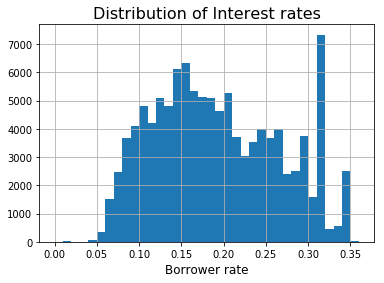

In [34]:
# Plot distribution of the interest rates
plt.figure(1, figsize = (6, 4))
bin_edges = np.arange(0, 0.36+0.01, 0.01)
plt.hist(data = df, x = "BorrowerRate", bins = bin_edges)
plt.grid()
plt.xlabel("Borrower rate", fontsize = 12)
plt.title("Distribution of Interest rates", fontsize = 16);

**The distribution of interest rates is slightly right-skewed** <br>
**The interest rate of 31.77% has the highest frequency in the given dataset which is a quite high rate.** <br>
**The majority of the loans granted through the Prosper company have interest rates between 10% and 20%.**

## Credit Score

In [35]:
df.CreditScore.describe()

count    112064.000000
mean        695.638814
std          64.461027
min           9.500000
25%         669.500000
50%         689.500000
75%         729.500000
max         889.500000
Name: CreditScore, dtype: float64

In [36]:
# Check for unusually low values
df[df["CreditScore"] < 100]

,Term,LoanStatus,BorrowerRate,LoanOriginalAmount,LoanOriginationDate,ProsperScore,BorrowerState,EmploymentStatus,EmploymentStatusDuration,IsBorrowerHomeowner,TotalCreditLinespast7years,DelinquenciesLast7Years,PublicRecordsLast10Years,DebtToIncomeRatio,IncomeRange,Recommendations,Purpose,StatedMonthlyIncome,Investors,InvestmentFromFriendsAmount,CreditScore
912,36,Defaulted,0.2600,1500,2006-11-20,NaN,IL,Not available,67,False,2,3,1,0.03000,Not displayed,0,Unknown,2316.666667,10,0,9.5
4290,36,Chargedoff,0.2375,4000,2006-04-26,NaN,Unknown,Not available,67,False,6,0,0,0.10368,Not displayed,0,Unknown,2916.666667,24,0,9.5
4371,36,Defaulted,0.2325,1500,2006-08-28,NaN,TX,Not available,67,False,2,2,0,0.22000,Not displayed,0,Unknown,0.000000,50,0,9.5
4672,36,Chargedoff,0.1930,1200,2007-02-08,NaN,Unknown,Not available,67,False,5,0,3,0.02000,Not displayed,0,Unknown,2666.666667,32,0,9.5
5684,36,Completed,0.2300,2550,2006-12-29,NaN,CA,Not available,67,False,2,0,0,0.09000,Not displayed,0,Unknown,1083.333333,57,0,9.5
7739,36,Chargedoff,0.2900,2500,2006-10-17,NaN,Unknown,Not available,67,False,2,0,1,0.07000,Not displayed,0,Unknown,1400.000000,27,0,9.5
9048,36,Defaulted,0.2900,1000,2006-12-18,NaN,TX,Not available,67,False,6,7,0,0.01000,Not displayed,0,Unknown,3166.666667,18,0,9.5
9473,36,Chargedoff,0.2500,2550,2006-10-11,NaN,Unknown,Not available,67,False,6,0,0,0.05000,Not displayed,0,Unknown,2000.000000,18,0,9.5
13938,36,Defaulted,0.1700,1000,2006-11-21,NaN,FL,Not available,67,False,2,0,0,0.02000,Not displayed,0,Unknown,2083.333333,8,0,9.5
14725,36,Chargedoff,0.1700,1600,2006-08-21,NaN,WV,Not available,67,False,2,2,0,0.13000,Not displayed,0,Unknown,916.666667,14,0,9.5


There are also some rows which have impossibly low values of Credit Score.
These particular entries can be treated as mistakes or strong outliers which should be removed from our dataset.

In [37]:
# Remove entries with extremely low Credit Scores
df = df[df["CreditScore"] > 100]

In [38]:
df.CreditScore.describe()

count    111994.000000
mean        696.067673
std          62.156072
min         369.500000
25%         669.500000
50%         689.500000
75%         729.500000
max         889.500000
Name: CreditScore, dtype: float64

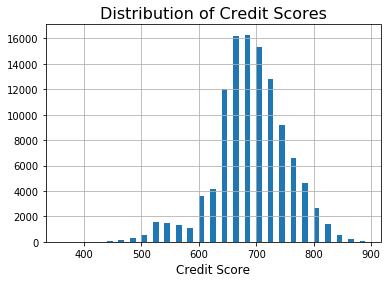

In [39]:
# Plot distribution of Credit Scores
plt.figure(1, figsize = (6, 4))
bin_edges = np.arange(360, 890+10, 10) 
plt.hist(data = df, x = "CreditScore", bins = bin_edges)
plt.grid()
plt.xlabel("Credit Score", fontsize = 12)
plt.title("Distribution of Credit Scores", fontsize = 16);

**The distribution of credit scores in this particular dataset follows approximately a normal distribution.** <br>
**The most of the people have credit scores in range from 650 to 730**

## Prosper Score

In [40]:
df.ProsperScore.value_counts()

4.0     12443
6.0     12161
8.0     11953
7.0     10489
5.0      9732
3.0      7565
9.0      6865
10.0     6122
2.0      5706
1.0       946
Name: ProsperScore, dtype: int64

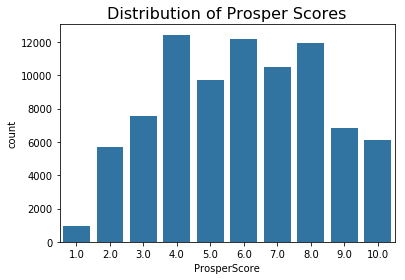

In [41]:
# Plot distribution of Prosper Scores
base_color = sb.color_palette()[0]
sb.countplot(data = df, x = "ProsperScore", color = base_color)
plt.title("Distribution of Prosper Scores", fontsize = 16);

**It can be seen from the distribution above that most of the clients have received a Prosper Score of 4,6 or 8.**

## Loan original amount

In [42]:
df.LoanOriginalAmount.describe()

count    111994.000000
mean       8352.242567
std        6242.740130
min        1000.000000
25%        4000.000000
50%        6500.000000
75%       12000.000000
max       35000.000000
Name: LoanOriginalAmount, dtype: float64

In [43]:
np.log10(df.LoanOriginalAmount.describe())

count    5.049195
mean     3.921803
std      3.795375
min      3.000000
25%      3.602060
50%      3.812913
75%      4.079181
max      4.544068
Name: LoanOriginalAmount, dtype: float64

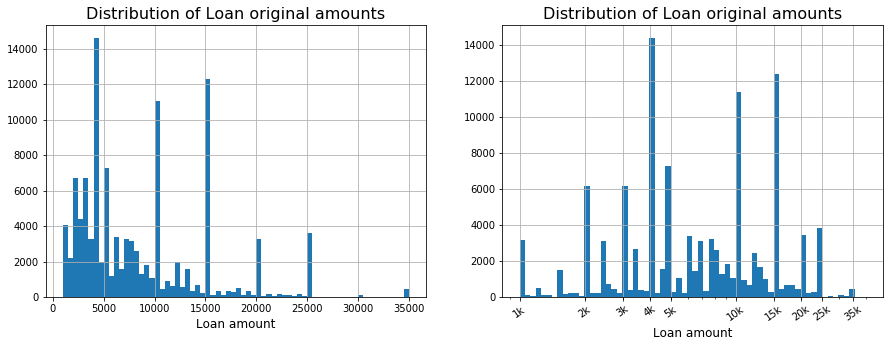

In [44]:
# ORIGINAL DISTRIBUTION
plt.figure(1, figsize = (15, 5))
plt.subplot(1,2,1)
bin_edges = np.arange(1000, 35000+500, 500) 
plt.hist(data = df, x = "LoanOriginalAmount", bins = bin_edges)
plt.grid()
plt.title("Distribution of Loan original amounts", fontsize = 16)
plt.xlabel("Loan amount", fontsize = 12);

# LOG SCALE DISTRIBUTION
plt.subplot(1,2,2)
bins = 10 ** np.arange(3, 4.6+0.025,0.025)
plt.hist(data = df, x = "LoanOriginalAmount",bins = bins)
plt.grid()
plt.xscale("log")
plt.xticks([1e3, 2e3, 3e3, 4e3, 5e3, 10e3, 15e3, 20e3, 25e3, 35e3],
           ["1k", "2k", "3k", "4k", "5k", "10k", "15k", "20k", "25k", "35k"],
           rotation = 35)
plt.title("Distribution of Loan original amounts", fontsize = 16)
plt.xlabel("Loan amount", fontsize = 12);

**As it can be seen from the graph above, the distribution is illuminating. <br>
There are very large spikes in frequency at the bars with loan amount of 1k, 2k, 3k, 4k, 5k etc.; frequency quickly trails off until the next spike. **

In [45]:
# Let's create a function for further log transformations
def log_trans(data, series):
    log_bin = 0.025
    bins = 10 ** np.arange(np.log10(data[series].describe().min()), np.log10(data[series].describe().max())+log_bin, log_bin)
    plt.hist(data = data, x = series, bins = bins)
    plt.xscale("log")

## Term

In [46]:
df.Term.value_counts()

36    86152
60    24228
12     1614
Name: Term, dtype: int64

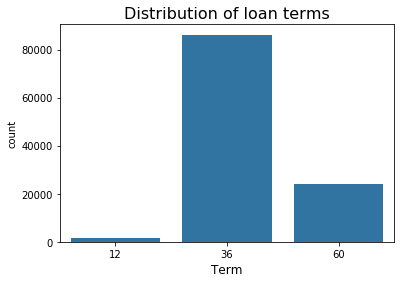

In [47]:
# Plot distribution of loan terms
sb.countplot(data = df, x = "Term", color = base_color);
plt.title("Distribution of loan terms", fontsize = 16)
plt.xlabel("Term", fontsize = 12);

**Most of the loans granted through the Prosper platform have maturity of 3 years.** <br>
**The least common are loans for only one year.**

## Purpose

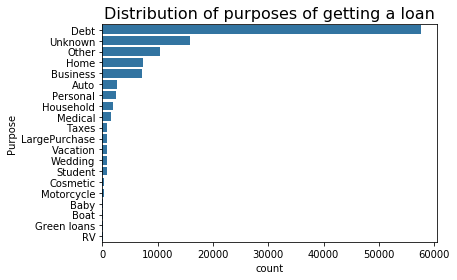

In [48]:
#  Plot distribution of purposes
new_order = df.Purpose.value_counts().index
sb.countplot(data = df, y = "Purpose", color = base_color, order = new_order)
plt.title("Distribution of purposes of getting a loan", fontsize = 16);

**Interestingly, that the most popular purpose of obtaining a loan from Prosper is to repay already existing another debt.** <br>
<br>
**It might be the case when people need money to repay their loans from the banks where they might have something as collateral (house for instance). So, they go to Prosper to obtain credit even with quite high rates just to repay a loan from the bank as Prosper doesn't require to put some assets as collateral. This hypothesis can't be proven within this analysis. However, there is some logical reasoning for that.**

## Income Range

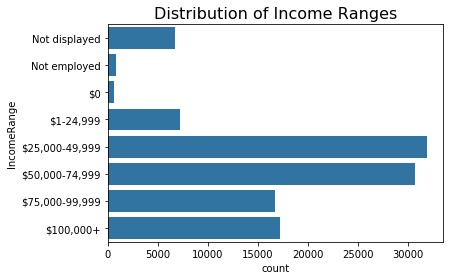

In [49]:
# Plot distribution of income ranges
sb.countplot(data = df, y = "IncomeRange", color = base_color)
plt.title("Distribution of Income Ranges", fontsize = 16);

**The distribution of income ranges shows that the majority of borrowers have an annual income within the range of 25K to 75K dollars.**

## Debt to Income Ratio

In [50]:
df.DebtToIncomeRatio.describe()

count    111994.000000
mean          0.272997
std           0.534790
min           0.000000
25%           0.150000
50%           0.220000
75%           0.310000
max          10.010000
Name: DebtToIncomeRatio, dtype: float64

In [51]:
# Let's delete 0 values as we might need to perform log transformations
df1 = df[df["DebtToIncomeRatio"] != 0]
print(df1.shape)

(111976, 21)


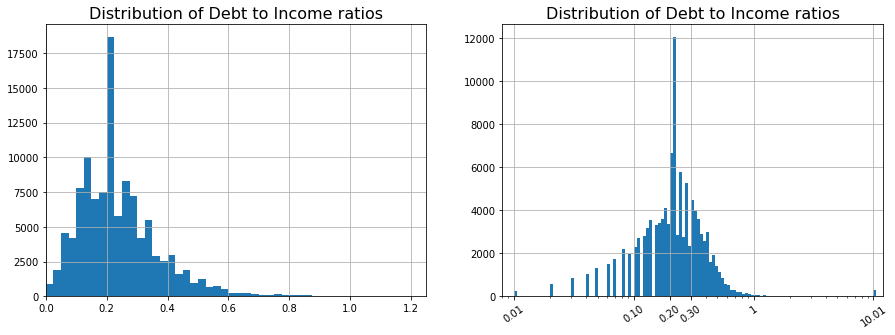

In [52]:
# ORIGINAL DISTRIBUTION
plt.figure(1, figsize = (15,5))
plt.subplot(1,2,1)
bins = np.arange(0, 10.01+0.025, 0.025)
plt.hist(data = df, x = "DebtToIncomeRatio", bins = bins)
plt.xlim((0,1.25))
plt.title("Distribution of Debt to Income ratios", fontsize = 16)
plt.grid();

# LOG SCALE DISTRIBUTION
plt.subplot(1,2,2)
log_trans(df1, "DebtToIncomeRatio")
plt.xticks([0.01, 0.10, 0.20, 0.30, 1, 10.01],
          ["0.01", "0.10", "0.20", "0.30", "1", "10.01"], rotation = 35)
plt.title("Distribution of Debt to Income ratios", fontsize = 16)
plt.grid();
plt.xlim((0.008,12));

**The most of the borrowers tend to have Debt to Income ratios in a range from 20% to 30%.**

## Employment status and Employment duration

In [53]:
print(df.EmploymentStatusDuration.describe())
# Delete 0 values as we will perform log transformations also
df2 = df[df["EmploymentStatusDuration"] != 0]
print(df2.shape)

count    111994.000000
mean         94.358707
std          91.880850
min           0.000000
25%          28.000000
50%          67.000000
75%         131.000000
max         755.000000
Name: EmploymentStatusDuration, dtype: float64
(110492, 21)


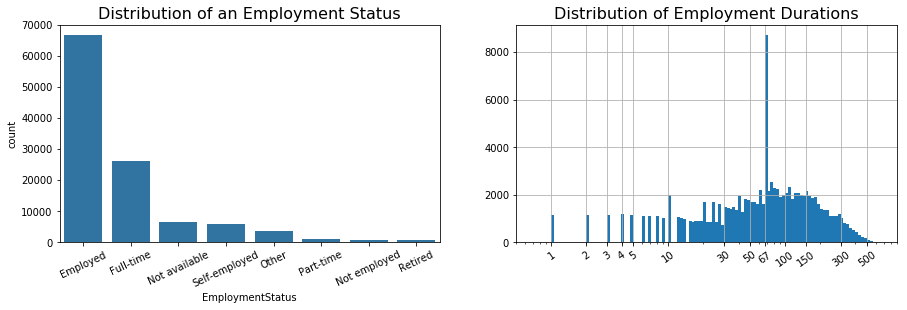

In [54]:
plt.figure(1, figsize = (15,4))
plt.subplot(1,2,1)
base_color = sb.color_palette()[0]
new_order = df.EmploymentStatus.value_counts().index
sb.countplot(data = df, x = "EmploymentStatus", color = base_color, order = new_order)
plt.xticks(rotation = 25)
plt.title("Distribution of an Employment Status", fontsize = 16);

plt.subplot(1,2,2)
log_trans(df2, "EmploymentStatusDuration")
plt.xlim((0.5, 900))
plt.xticks([1, 2, 3, 4, 5, 10, 30, 50, 67, 100, 150,300, 500],
          [1, 2, 3, 4, 5, 10, 30, 50, 67, 100, 150, 300, 500], rotation = 35)
plt.grid()
plt.title("Distribution of Employment Durations", fontsize = 16);

**Most of the borrowers are employed individuals. Unfortunately, the "Employed" category is not defined very well in terms of what type of employment it is. The most common employment type is a full-time.** <br>
**The distribution of employment status durations reveals that most of the Prosper's clients are employed for 4 - 15 years. There is a huge spike at the duration of 67 months.** 

## Investors

In [55]:
df.Investors.describe()

count    111994.000000
mean         81.280444
std         103.695700
min           1.000000
25%           2.000000
50%          45.000000
75%         117.000000
max        1189.000000
Name: Investors, dtype: float64

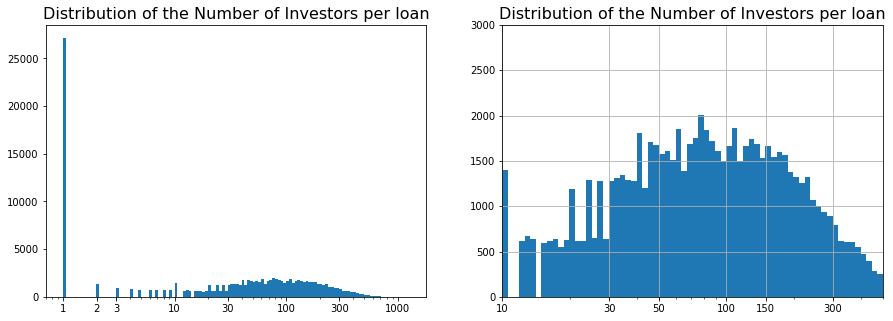

In [56]:
plt.figure(1, figsize = (15,5))
plt.subplot(1,2,1)
bins = 10 ** np.arange(0, 3.08+0.025, 0.025)
plt.hist(data = df, x = "Investors", bins = bins)
plt.xscale("log")
plt.xticks([1, 2, 3, 10, 30, 100, 300, 1000],
          [1, 2, 3, 10, 30, 100, 300, 1000]);
plt.title("Distribution of the Number of Investors per loan", fontsize = 16);

plt.subplot(1,2,2);
log_trans(df, "Investors")
plt.xticks([1, 2, 3, 10, 30, 50, 100, 150, 300],
          [1, 2, 3, 10, 30, 50, 100, 150, 300]);
plt.xlim((10,500))
plt.ylim((0, 3000))
plt.grid()
plt.title("Distribution of the Number of Investors per loan", fontsize = 16);

**As it can be seen from the histograms above, most of the time only one investor covered a full amount of the loan.** <br>
**However, if we look at the bulk of distribution, we can observe that there are quite a lot of cases when 50 to 150 investors invested in the loan at the same time.**

## Ownership of the house

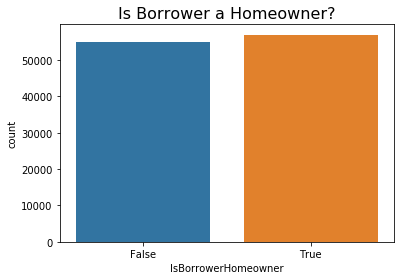

In [57]:
# Plot distribution
sb.countplot(data = df, x = "IsBorrowerHomeowner")
plt.title("Is Borrower a Homeowner?", fontsize = 16);

**The borrowers in the given dataset are split approximately by half into two groups, homeowners and those who don't have his own real estate.**

In [58]:
# Save the clean dataframe into a new csv file
df.to_csv("ProsperData(clean).csv", index = False, encoding = "utf-8")

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> The distribution of interest rates is slightly right-skewed. During an exploration phase, I've discovered that some of the loans had extremely low or even zero interest rates. After an investigation, I decided to remove these particular rows as only a few of them were valid when the full amount of the loan was granted by a borrower's friend.  <br>
The interest rate of 31.77% has the highest frequency in the given dataset which is a quite high rate. <br>
The majority of the loans granted through the Prosper company have interest rates between 10% and 20%. <br>
<br>
The distribution of credit scores in this particular dataset follows approximately a normal distribution. <br>
There were some rows which had impossibly low values of Credit Score. Therefore, these particular entries were removed from our dataset. <br>
The most of the people have credit scores in range from 650 to 730. <br>
Most of the clients received a Prosper Score of 4,6 or 8.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> In the Univariate exploration step, I looked at the distributions of the features which might also affect interest rates. So, the following variables were investigated:
* **LoanOriginalAmount** (The log transformation was needed because of the large range of values. There are very large spikes in frequency at the bars with loan amount of 1k, 2k, 3k, 4k, 5k etc.; frequency quickly trails off until the next spike.)
* **Term** (Most of the loans granted through the Prosper platform have maturity of 3 years. The least common are loans for only one year.)
* **Purpose** (The most popular purpose of obtaining a loan from Prosper is to repay already existing another debt.)
* **Income Range** (The distribution of income ranges shows that the majority of borrowers have an annual income within the range of 25K to 75K dollars.)
* **DebtToIncomeRatio** (The log transformation was also used due to large range of values. The most of the borrowers tend to have Debt to Income ratios in a range from 20% to 30%.
* **EmploymentStatus** (Most of the borrowers are employed individuals.)
* **EmploymentStatusDuration** (The log scale was also used for the same reason. The distribution of employment status durations reveals that most of the Prosper's clients are employed for 4 - 15 years. There is a huge spike at the duration of 67 months.)
* **Investors** (Log transformation was also performed. Most of the time only one investor covered a full amount of the loan. However, if we look at the bulk of distribution, we can observe that there are quite a lot of cases when 50 to 150 investors invested in the loan at the same time.)
* **Ownership of the house** (The borrowers in the given dataset are split approximately by half into two groups, homeowners and those who don't have his own real estate.)

# BIVARIATE EXPLORATION

Let's start from the pairwise correlations present between features in the data.

In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 111994 entries, 0 to 113936
Data columns (total 21 columns):
Term                           111994 non-null category
LoanStatus                     111994 non-null object
BorrowerRate                   111994 non-null float64
LoanOriginalAmount             111994 non-null int64
LoanOriginationDate            111994 non-null datetime64[ns]
ProsperScore                   83982 non-null float64
BorrowerState                  111994 non-null object
EmploymentStatus               111994 non-null object
EmploymentStatusDuration       111994 non-null int32
IsBorrowerHomeowner            111994 non-null bool
TotalCreditLinespast7years     111994 non-null int32
DelinquenciesLast7Years        111994 non-null int32
PublicRecordsLast10Years       111994 non-null int32
DebtToIncomeRatio              111994 non-null float64
IncomeRange                    111994 non-null category
Recommendations                111994 non-null int64
Purpose            

In [60]:
numeric_vars = ["BorrowerRate", "CreditScore", "ProsperScore", "LoanOriginalAmount", "DebtToIncomeRatio",
               "EmploymentStatusDuration", "Investors"]
categorical_vars = ["Purpose", "IncomeRange", "EmploymentStatus", "IsBorrowerHomeowner", "Term"]

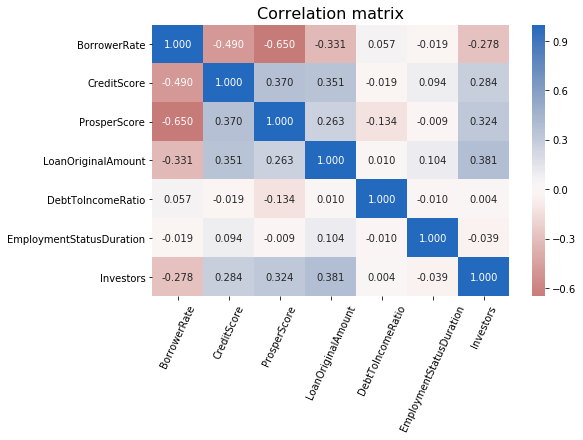

In [61]:
# correlation plot
plt.figure(figsize = [8, 5])
sb.heatmap(df[numeric_vars].corr(), annot = True, fmt = '.3f',
           cmap = 'vlag_r', center = 0)
plt.title ("Correlation matrix", fontsize = 16);
plt.xticks(rotation = 65);

**The above correlation matrix shows that as expected credit/risk score variables (Credit Score and Proper Score) have the strongest correlation with the variable of interest.** 
**Particularly, the Prosper's own risk score has a higher correlation with an interest rate comparing to the Credit Score because the Credit Score is provided by a third party Consumer Credit Rating Agency.**

**Surprisingly, there is no a strong correlation between interest rates and loan amounts. There are a bit better correlations between loan amount and number of investors, loan amount and credit score but it's not in the scope of this particular analysis.**

**Correlation coefficients can be misleading. So, let's plot a sample matrix to visualize these correlations.**

D:\2018_TIME_TO_CHANGE\Install_stuff\lib\site-packages\pandas\core\indexing.py:1472: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  return self._getitem_tuple(key)


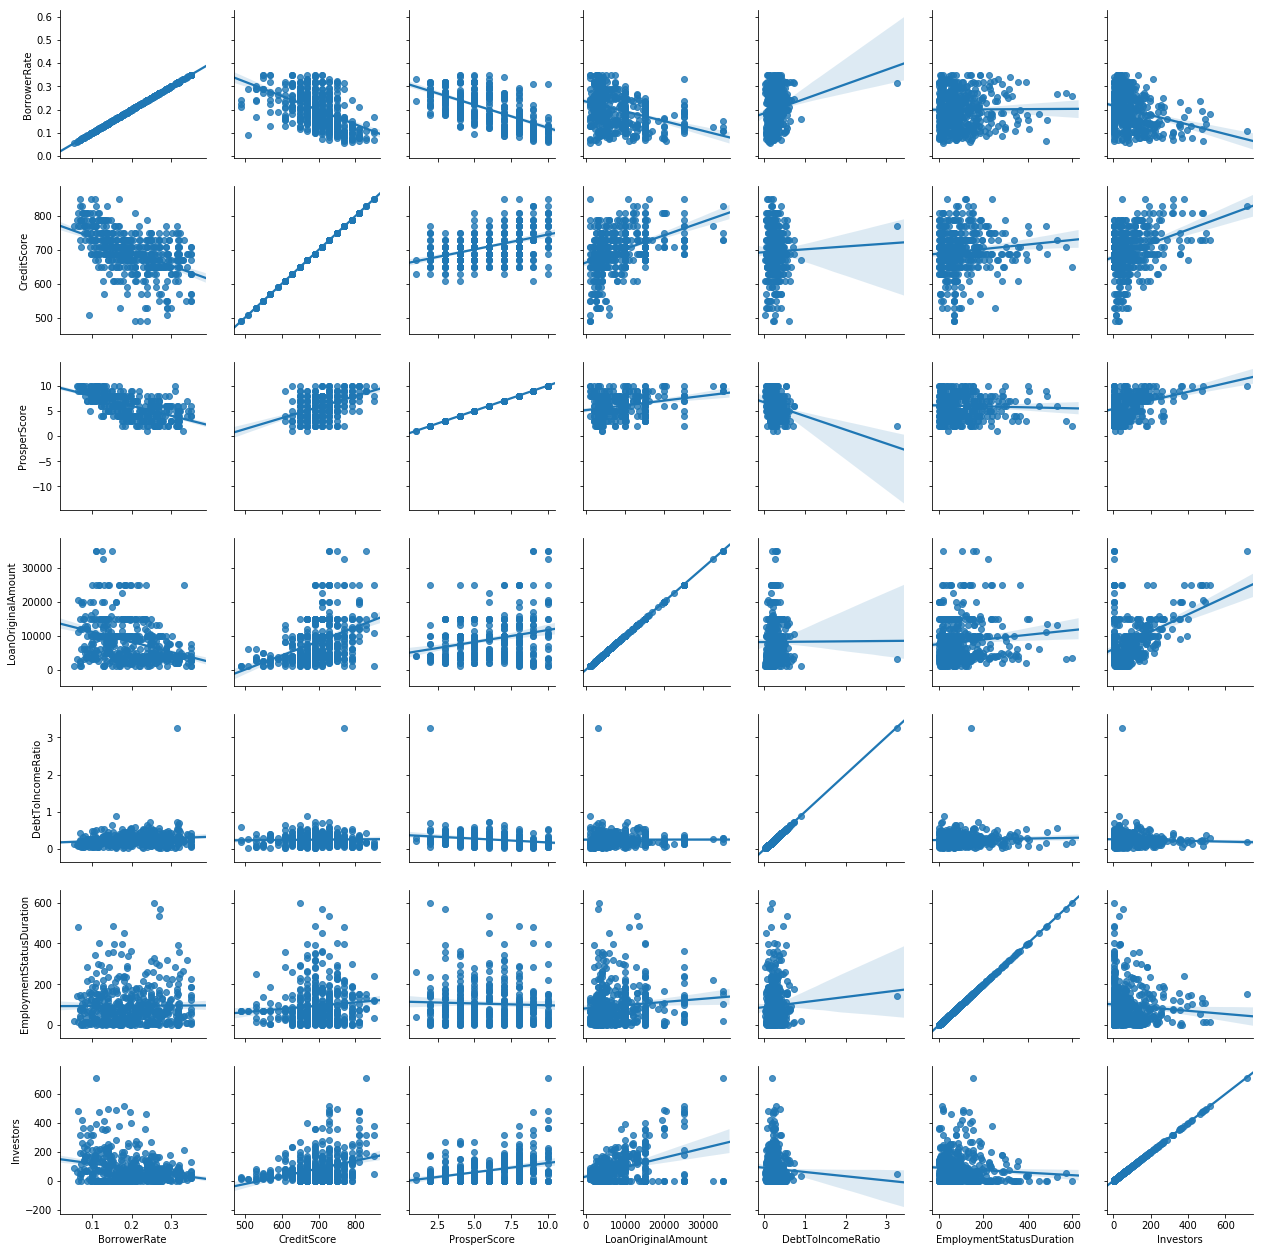

In [62]:
# plot a sample matrix to visualize these correlations
# sample of 500 entries
samples = np.random.choice(df.shape[0], 500, replace = False)
df_samp = df.loc[samples,:]

g = sb.PairGrid(data = df_samp, vars = numeric_vars)
g.map(sb.regplot);

**Let's take a closer look at the relationships between the Borrower Rate and Credit Score/Prosper Score.**

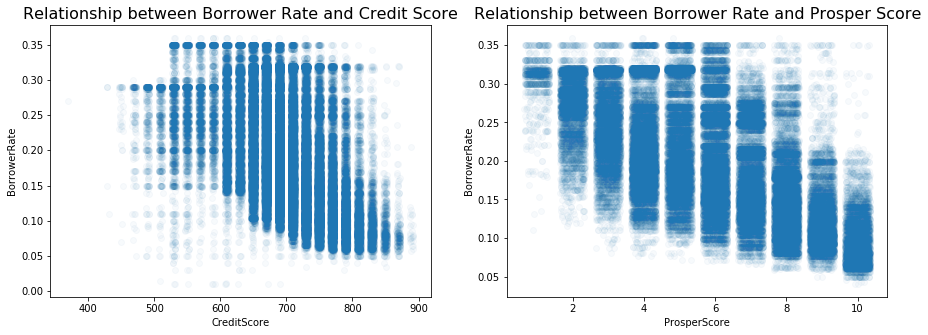

In [63]:
plt.figure(1, figsize = (15,5))
plt.subplot(1,2,1)
sb.regplot(data = df, x = "CreditScore", y = "BorrowerRate", scatter_kws = {"alpha": 0.03}, x_jitter = 3, fit_reg = False);
plt.title("Relationship between Borrower Rate and Credit Score", fontsize = 16);

plt.subplot(1,2,2)
sb.regplot(data = df, x = "ProsperScore", y = "BorrowerRate", scatter_kws = {"alpha": 0.03}, x_jitter = 0.35, fit_reg = False);
plt.title("Relationship between Borrower Rate and Prosper Score", fontsize = 16);

**The scatterplots above prove that the higher the Credit Score/Prosper Score the lower interest rate which is what I expected to observe.** <br>
**The next step will be looking at how borrower rate and Prosper score/Credit score are correlated with the categorical variables.**

D:\2018_TIME_TO_CHANGE\Install_stuff\lib\site-packages\pandas\core\indexing.py:1472: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  return self._getitem_tuple(key)


<Figure size 720x720 with 0 Axes>

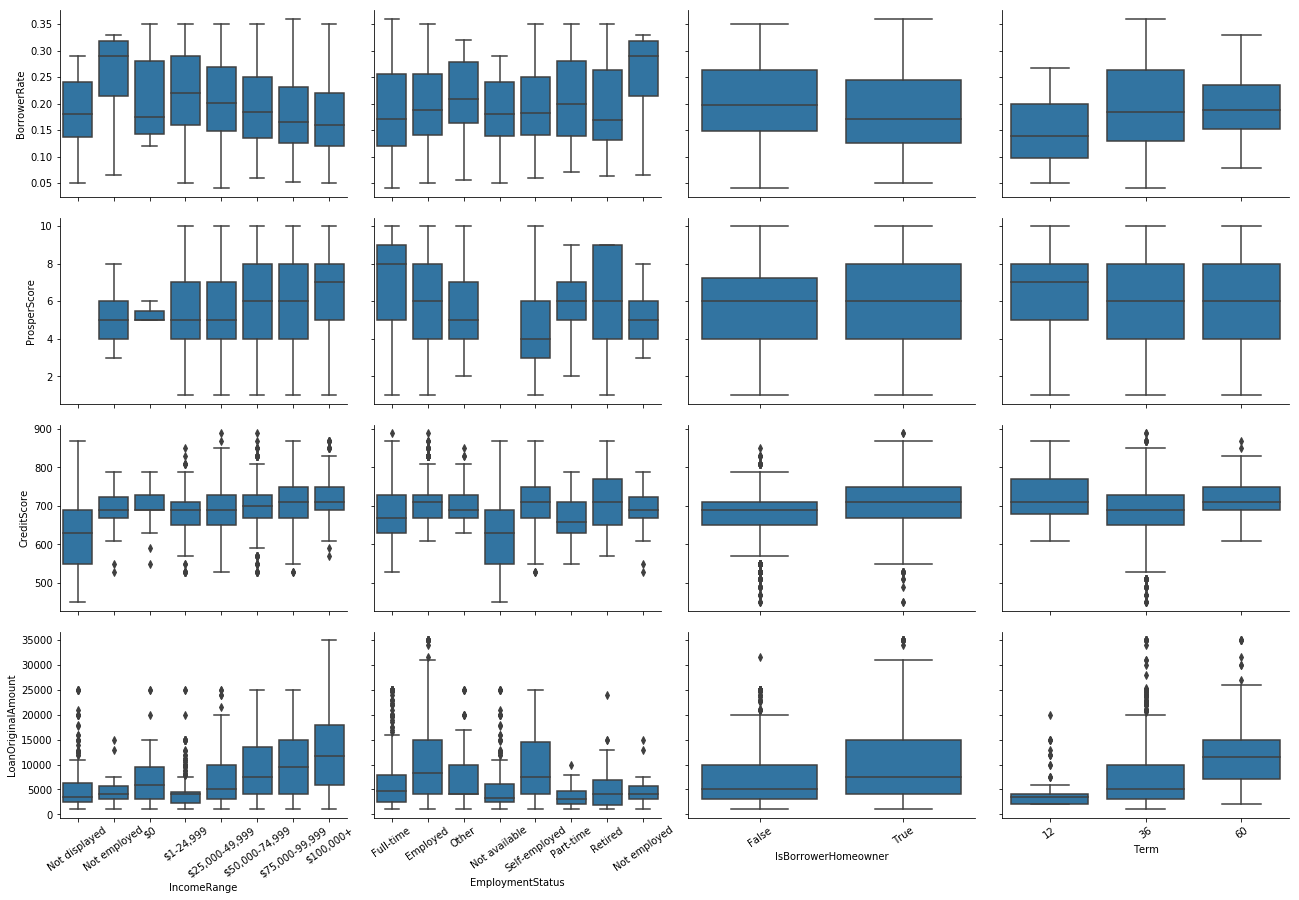

In [64]:
# plot matrix of numeric features against categorical features.
categorical_vars = ["IncomeRange", "EmploymentStatus", "IsBorrowerHomeowner", "Term"]
samples = np.random.choice(df.shape[0], 5000, replace = False)
df_samp = df.loc[samples,:]

def boxgrid(x, y, **kwargs):
    """ Quick hack for creating box plots with seaborn's PairGrid. """
    base_color = sb.color_palette()[0]
    sb.boxplot(x, y, color = base_color)
    plt.xticks(rotation = 35)

plt.figure(figsize = [10, 10])
g = sb.PairGrid(data = df_samp, y_vars = ['BorrowerRate', 'ProsperScore', "CreditScore", "LoanOriginalAmount"],
                x_vars = categorical_vars,
                size = 3, aspect = 1.5)
g.map(boxgrid);

* **The above graphs reveal that interest rates seem to be lower for individuals with higher annual incomes, and the highest for those who are unemployed. The Prosper Scores and Credit Scores support the opposite trend which is what I expected to see because of the negative correlations between them and interest rate.** <br>
<br>
* **Interestingly, the interest rates seem to be slightly lower for borrowers who own the house. However, the Prosper company doesn't take houses as collateral and no difference in Prosper Scores is evidence of that. So, the Prosper Company is indifferent whether a borrower owns a house or not, this feature doesn't affect the risk score developed internally. On the other hand, third party Consumer Credit Rating agencies make their scores by taking into account this feature. That's why we observe the higher Credit Scores for homeowners. Therefore, the lower interest rates for homeowners is partially an effect of the correlation between Credit Scores and Borrower rates.** <br>
<br>
* **The interest rates tend to be higher for the long-term loans as the default risk is increasing within the time. So, this implies that risk scores should have the opposite relationship. Actually, the Prosper Score serves as evidence of this statement. However, Credit Score doesn't prove this because these Credit Scores are made without taking into account the terms as they developed based on the characteristics of the individual rather than on characteristics of the particular loan.** <br>

**The next step is to check for what loan purposes borrowers receive the highest and lowest interest rates.**

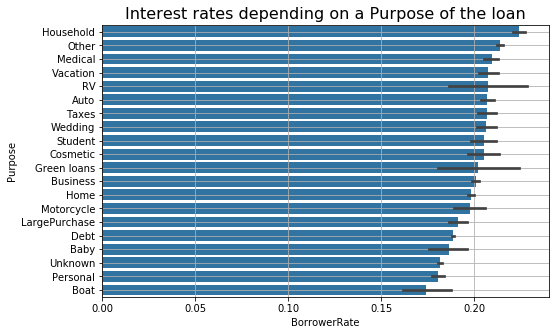

In [65]:
# Plot a graph
plt.figure(1, figsize = (8,5))
group_means = df.groupby("Purpose").mean()
group_order = group_means.sort_values("BorrowerRate", ascending = False).index
sb.barplot(data = df, y = "Purpose", x = "BorrowerRate", color = base_color, order = group_order)
plt.title("Interest rates depending on a Purpose of the loan", fontsize = 16);
plt.grid()

* **Overall, there are no significant differences in  interest rates across different purposes but still the highest interest rates are set for the loans which are taken for the household expenses. It's due to the fact that these loans have the lowest Prosper Scores.**
<br> <br>
* **The lowest rates are set for the purchasing a boat and personal expenses. It's due to the fact that loans taken for a boat have one of the highest Prosper Scores. In terms of the personal expenses, there is might be another relationship. The loans for personal expenses tend to have low original amounts but a higher number of investors. Therefore, in accordance with these findings, default risks are spread out which makes interest rates one of the lowest.**

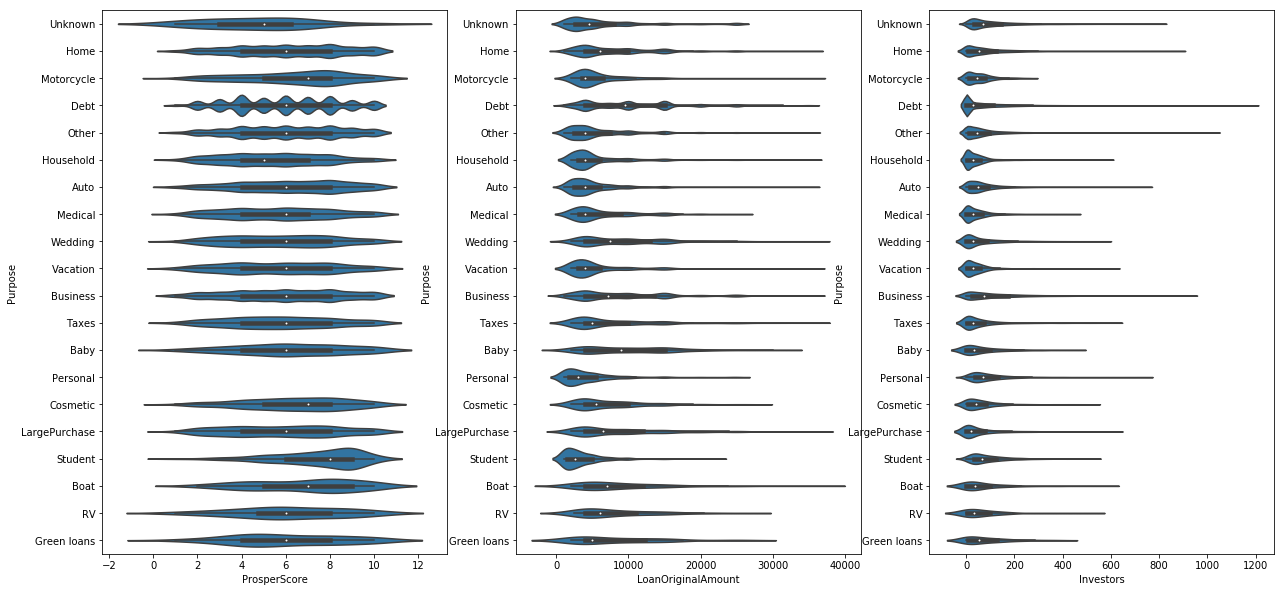

In [66]:
# Proof of the relatinships
fig, ax = plt.subplots(ncols = 3, nrows = 1 , figsize = [21,10])
vars = ["ProsperScore", "LoanOriginalAmount", "Investors"]
for i in range(3):
    var = vars[i]
    sb.violinplot(data = df, y = "Purpose", x = var, color = base_color, ax = ax[i]);

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> Correlation matrix proved my expectations that the Prosper Scores and Credit Scores have the strongest relationships with interest rates. Prosper Score has a higher correlation coefficient with interest rate rather than Credit Score because Prosper Scores are developed internally taking into account characteristics of the loan. Contrary, Credit Scores are developed by a third party and take into consideration only characteristics of the particular individual which allow them to serve as an initial risk score. <br>
Surprisingly, that there is no strong correlation between interest rates and loan amounts. <br>
<br>
In addition to that, relationships between our features of interest and categorical variables were considered and investigated. <br>
The graphs revealed that interest rates seem to be lower for individuals with higher annual incomes, and the highest for those who are unemployed. The Prosper Scores and Credit Scores support the opposite trend which is what I expected to see because of the negative correlations between them and interest rate. In the next section, I'll investigate this relationship across different ProsperScore levels.<br>
<br>
Interestingly, the interest rates seem to be slightly lower for borrowers who own the house. However, the Prosper company doesn't take houses as collateral and no difference in Prosper Scores is evidence of that. So, the Prosper Company is indifferent whether a borrower owns a house or not, this feature doesn't affect the risk score developed internally. On the other hand, third party Consumer Credit Rating agencies make their scores by taking into account this feature. That's why we observe the higher Credit Scores for homeowners. Therefore, the lower interest rates for homeowners is partially an effect of the correlation between Credit Scores and Borrower rates. In the next section, I'll investigate the relationship between the interest rates and the fact of house ownership across all levels of the Prosper Score.<br>
<br>
The interest rates tend to be higher for the long-term loans as the default risk is increasing within the time and the Prosper Score serves as evidence of this statement. So, in the next part, I'll also take a look at this relationship across the different Prosper scores.<br>

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

>  There is also a positive correlation between loan amount and number of investors as the more investors are involved in the process of funding a loan, the potentially bigger amount can be. Moreover, there is also a correlation between the loan amount and credit score. Also, there are tendencies of increasing the loan amount with increasing income range, a term of the loan and the fact of house ownership. However, these relationships are not in the scope of this particular analysis.

# MULTIVARIATE EXPLORATION

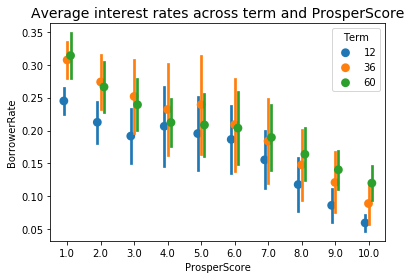

In [67]:
# Plot interest rates across time and Prosper Scores
sb.pointplot(data = df, x = "ProsperScore", y = "BorrowerRate", hue = "Term", linestyles = "", dodge = 0.2, ci = "sd");
plt.title("Average interest rates across term and ProsperScore", fontsize = 14);

**The 1 year loans have the lowest interest rates across all levels of Prosper Score.** <br>
**The 3 years loans tend to have highest interest rates across Prosper Scores in a range of 1 to 6. In the range 6-10 there is an opposite situation, 5 years loans are provided with the highest rates.** <br>
<br>
**Overall, this plot proves our findings in the bivariate exploration part.**

(array([0, 1]), <a list of 2 Text xticklabel objects>)

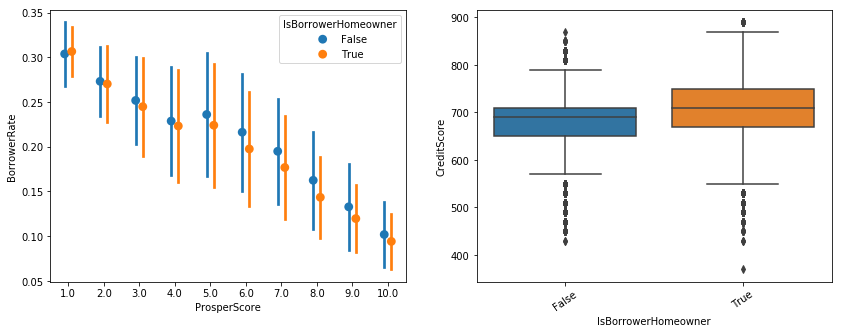

In [68]:
# Plot interest rates across Prosper Scores and the fact of the house ownership
plt.figure(1, figsize = (14,5))
plt.subplot(1,2,1)
sb.pointplot(data = df, x = "ProsperScore", y = "BorrowerRate", hue = "IsBorrowerHomeowner", linestyles = "", dodge = 0.2, ci = "sd");
#plt.title("Average interest rates depending on house ownership and ProsperScore", fontsize = 14);

plt.subplot(1,2,2)
sb.boxplot(data = df, x = "IsBorrowerHomeowner", y = "CreditScore")
plt.xticks(rotation = 35)

**The above chart shows that borrowers who own real estate receive on average slightly lower interest rates comparing to borrowers who don't. It's due to the fact that borrowers with houses receive higher Credit Scores and we observed a negative correlation between interest rates and credit scores.** <br>
**Therefore, this plot also serves as proof of our findings in the previous section.**

Now, let's take a look at the average interest rates across income range and Prosper Score. The "Not displayed" category in the IncomeRange column will not be displayed on the following plot as there are no ProsperScore values for this category, only NaNs. It is due to the fact that loans with this notations were made and recorded before 2009 and Prosper Scores are applicable only for the loans after July 2009.

In [69]:
df.query("IncomeRange == 'Not displayed'").shape[0] == df.query("IncomeRange == 'Not displayed'")["ProsperScore"].isna().shape[0]

True

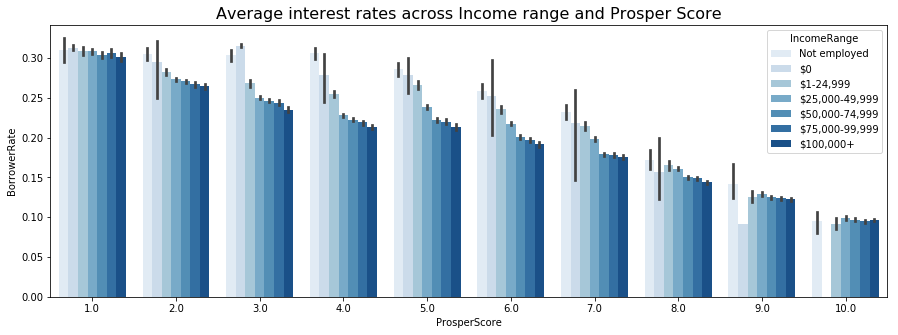

In [70]:
plt.figure(1, figsize = (15,5))
categories = ['Not employed', '$0', '$1-24,999','$25,000-49,999','$50,000-74,999', '$75,000-99,999', '$100,000+']
sb.barplot(data = df, x = "ProsperScore", y = "BorrowerRate", hue = "IncomeRange", palette = "Blues",
           hue_order = categories)
plt.title("Average interest rates across Income range and Prosper Score", fontsize = 16);

**So, as we predicted in the bivariate exploration part, the average interest rates are lower for individuals with the higher income range and the highest for not employed. <br>
However, this difference is negligible in two extreme cases when Prosper Scores are extremely low (min value = 1) or extremely high (max value = 10).**

In the end, let's plot a distribution of the loans depending on loan amount, interest rate and prosper score.

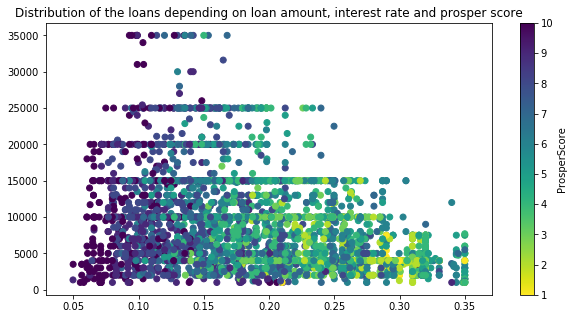

In [71]:
plt.figure(1, figsize = (10,5))
plt.scatter(data = df_samp, x = "BorrowerRate", y = "LoanOriginalAmount", c = "ProsperScore",
           cmap = "viridis_r")
plt.colorbar(label = "ProsperScore")
plt.title("Distribution of the loans depending on loan amount, interest rate and prosper score");

**It looks like that most of the loans with high ProsperScores and as a result, low-interest rates are for the amounts mostly below 20K dollars.**

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> All of the plots in this section just prove my estimates and predictions from the bivariate exploration part. Also, the plots make those findings more visible. <br>
<br>
Under the normal circumstances when Prosper Score is above 6, it's clearly seen that average interest rates are incresing with increasing the length of the loans as probability of default is higher. <br>
<br>
Borrowers who own real estate receive on average slightly lower interest rates comparing to borrowers who don't. It's due to the fact that borrowers with houses receive higher Credit Scores and we observed a negative correlation between interest rates and credit scores. <br>
<br>
Also as I predicted in the previous part, the average interest rates are lower for individuals with the higher income range and the highest for not employed across all levels of the Prosper Score. However, this difference is negligible in two extreme cases when Prosper Scores are extremely low (min value = 1) or extremely high (max value = 10). <br>
<br>
Finally, I also checked relationship between loan amounts, Prosper scores and interest rates. It looks like that most of the loans with high ProsperScores and as a result, low-interest rates are for the amounts mostly below 20K dollars.
